# 파일 불러오기

In [44]:
from zipfile import ZipFile

In [45]:
zipfile = ZipFile("patent_summarization_.zip")
zipfile.extractall("./patent_summarization_")

In [46]:
import glob
import pandas as pd
import json
from tqdm import tqdm

## 논문-특허 자료 데이터 생성

In [47]:
# 논문 & 특허
def extract_needed_data(file, doc_type=None):
    with open(file,"r",encoding='utf-8') as f:
        data = json.load(f)
    file_list = [file.split("\\")[-1]]*data['totalcount']
    doc_id_list = []
    doc_type_list = []
    title_list = []
    section_list = []
    entire_list = []
    for i in range(data['totalcount']):
        try:
            tmp_doc_type = data['data'][i]['doc_type']
        except:
            tmp_doc_type = doc_type
        doc_type_list.append(tmp_doc_type)
        doc_id_list.append(data['data'][i]['reg_no'])
        title_list.append(data['data'][i]['title'])
        section_list.append(data['data'][i]['summary_section'][0]['orginal_text'])
        try:
            entire_text = data['data'][i]['summary_entire'][0]['orginal_text']
        except:
            entire_text = ''
        entire_list.append(entire_text)
    return pd.DataFrame({'file' : file_list, 'doc_id' : doc_id_list,'doc_type' : doc_type_list, 'title' : title_list, "section_text" : section_list, "entire_text" : entire_list, })

In [48]:
# paper_pd = pd.DataFrame()
patent_pd = pd.DataFrame()
patent_all_pd = pd.DataFrame()
for data in ["Training","Validation"]:
    for file in tqdm(glob.glob(f"./patent_summarization_/{data}/*[!zip]/*")):
        if "논문" in file: # │φ╣« : 논문 
            # paper_pd = pd.concat([paper_pd, extract_needed_data(file,"논문")])
            pass
        elif "╞»╟π╝╜╝╟╕╕" in file: # ╞»╟π╝╜╝╟╕╕ :특허섹션만
            patent_pd = pd.concat([patent_pd, extract_needed_data(file,"특허")])
            tmps = file
        elif "╞»╟π└ⁿ├╝" in file: #╞»╟π└ⁿ├╝ : 특허전체
            patent_all_pd = pd.concat([patent_all_pd, extract_needed_data(file,"특허")])
            tmpss = file

# print("논문자료 요약, 논문 데이터 개수:",len(paper_pd))
print("논문자료 요약, 특허섹션 데이터 개수:",len(patent_pd))
print("논문자료 요약, 특허전체 데이터 개수:",len(patent_all_pd))

100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

논문자료 요약, 특허섹션 데이터 개수: 151000
논문자료 요약, 특허전체 데이터 개수: 156300


In [49]:
patent_pd = patent_pd.reset_index(drop=True)
patent_all_pd = patent_all_pd.reset_index(drop=True)

## title 및 text 기준 중복 데이터 개수 확인

In [50]:
patent_title_list = patent_pd.title.to_list()
patent_all_title_list = patent_all_pd.title.to_list()

print(f"특허 일부 데이터 151000개 중 특허 전체 title과 일치하는 개수 및 비율: {patent_pd.title.isin(patent_all_title_list).sum()} [{round(patent_pd.title.isin(patent_all_title_list).sum()/len(patent_pd)*100,2)}%]")
print(f"특허 일부 데이터 151000개 unique 개수: {len(set(patent_title_list))}[{round(len(set(patent_title_list))/len(patent_pd)*100,2)}%]")

print(f"특허 전체 데이터 156300개 중 특허 전체 title과 일치하는 개수 및 비율: {patent_all_pd.title.isin(patent_title_list).sum()} [{round(patent_all_pd.title.isin(patent_title_list).sum()/len(patent_all_pd)*100,2)}%]")
print(f"특허 일부 데이터 156300개 unique 개수: {len(set(patent_all_title_list))}[{round(len(set(patent_all_title_list))/len(patent_all_pd)*100,2)}%]")

print(f"특허 일부 + 전체 데이터 unique title 개수: {len(set(patent_title_list + patent_all_title_list))}")



특허 일부 데이터 151000개 중 특허 전체 title과 일치하는 개수 및 비율: 138383 [91.64%]
특허 일부 데이터 151000개 unique 개수: 133940[88.7%]
특허 전체 데이터 156300개 중 특허 전체 title과 일치하는 개수 및 비율: 138040 [88.32%]
특허 일부 데이터 156300개 unique 개수: 139567[89.29%]
특허 일부 + 전체 데이터 unique title 개수: 151785


In [51]:
patent_section_text_list = patent_pd.section_text.to_list()
patent_all_section_text_list = patent_all_pd.section_text.to_list()

print(f"특허 일부 데이터 151000개 중 특허 전체 section_text과 일치하는 개수 및 비율: {patent_pd.section_text.isin(patent_all_section_text_list).sum()} [{round(patent_pd.section_text.isin(patent_all_section_text_list).sum()/len(patent_pd)*100,2)}%]")
print(f"특허 일부 데이터 151000개 unique 개수: {len(set(patent_section_text_list))}[{round(len(set(patent_section_text_list))/len(patent_pd)*100,2)}%]")
print(f"특허 전체 데이터 156300개 중 특허 전체 section_text과 일치하는 개수 및 비율: {patent_all_pd.section_text.isin(patent_section_text_list).sum()} [{round(patent_all_pd.section_text.isin(patent_section_text_list).sum()/len(patent_all_pd)*100,2)}%]")
print(f"특허 일부 데이터 156300개 unique 개수: {len(set(patent_all_section_text_list))}[{round(len(set(patent_all_section_text_list))/len(patent_all_pd)*100,2)}%]")
print(f"특허 일부 + 전체 데이터 unique section_text 개수: {len(set(patent_section_text_list + patent_all_section_text_list))}")



특허 일부 데이터 151000개 중 특허 전체 section_text과 일치하는 개수 및 비율: 137598 [91.12%]
특허 일부 데이터 151000개 unique 개수: 143459[95.01%]
특허 전체 데이터 156300개 중 특허 전체 section_text과 일치하는 개수 및 비율: 136767 [87.5%]
특허 일부 데이터 156300개 unique 개수: 149597[95.71%]
특허 일부 + 전체 데이터 unique section_text 개수: 162508


여기서 선택해야 할 방향은 다양한데 다음과 같이 몇 가지를 제시함
1. 특허 전체 데이터만 사용
2. 특허 일부 데이터만 사용
3. title과 section text가 겹치는 데이터는 소거한 상태에서 사용 => 전제조건 : 유사한 title 혹은 section text는 전처리를 통해 걸러야 함

우선, patent section text가 title을 생성하기 위한 적절한 데이터인지 확인

In [52]:
for i in range(len(patent_pd)):
    patent_row = patent_pd.iloc[i]
    print(f"[{i}] {patent_row.title}")
    print(patent_row.section_text)
    print()

    if i == 2:
        break

[0] 아우로라 키나아제의 억제에 의해 유사분열 진행을 억제하기 위한 화합물 및 그 화합물을 포함하는 약학적 조성물
미국 암 학회(American Cancer Society)에 따르면, 2004년에는 대략 천사백만 명의 미국인들이 암으로 새로 진단받았으며, 대략 56만 명이 암으로 사망한 것으로 추산되었다.  의약의 진보가 암 생존율을 개선시키고는 있지만, 신규하고 더욱 효과적인 치료법이 계속적으로 요구되고 있는 실정이다.암은 조절되지 않은 세포 증식에 의해 특징된다.  유사분열은, 일련의 복합 사건에 의해 크로모좀이 2개의 완전히 똑같은 딸세포로 분리되게 하는 세포 주기에서의 단계이다.  탁산 및 빈카 알칼로이드를 포함하는 현재의 다수 암 치료법은, 유사분열 조직을 억제시키도록 작용한다.  유사분열 진행은 주로, 유사분열 키나아제에 의해 매개되는 인산화 및 단백질 분해에 의해 조절된다.  아우로라 키나아제 부류의 구성원들(예를 들어, 아우로라 A, 아우로라 B, 아우로라 C)은, 센트로좀 분리, 스핀들 동역학, 스핀들 어셈블리 체크포인트, 크로모좀 정렬, 및 세포질분열을 조절함으로써 유사분열 진행을 조절한다 [참조: Dutertre et al., Oncogene, 21: 6175 (2002); Berdnik et al., Curr. Biol., 12: 640 (2002)].  아우로라 키나아제의 과발현 및/또는 증폭은 결장 및 유방 종양을 포함하는 다수의 종양 유형에서 종양형성과 관련되어 있었다 [참조: Warner et al., Mol. Cancer Ther., 2: 589 (2003); Bischoff et al., EMBO, 17: 3062 (1998); Sen et al., Cancer Res., 94: 1320 (2002)].  또한, 종양 세포에서 아우라 키나아제를 억제하면 유사분열 정지 및 세포자멸사가 야기되는 데, 이는 이들 키나아제가 암 치료를 위한 중요한 표적임을 제안한다 [참조: Ditchfield, J. Cell Biol., 161: 2

다운받은 데이터는 요약 데이터로, 타이틀과 관련이 없는 섹션 문단을 포함하는 경우가 다수 있다.   
따라서 섹션 문단을 바탕으로 타이틀을 생성하기 어려울 것으로 판단되므로, 특허 섹션 데이터는 제외한다.

# 중복 데이터 개수 확인 및 제거

In [53]:
patent_all_pd_title_duplicated_num = [(t,n) for t,n in zip(patent_all_pd.title.value_counts().index, patent_all_pd.title.value_counts().values) if n > 1]
print(patent_all_pd_title_duplicated_num[:10])

[('반도체 장치', 176), ('액정표시장치', 172), ('이동 단말기', 144), ('냉장고', 115), ('표시 장치', 113), ('이동 단말기 및 그 제어방법', 111), ('기판 처리 장치', 101), ('조명 장치', 99), ('디스플레이 장치', 81), ('발광소자', 77)]


In [54]:
print("중복 횟수:",patent_all_pd[patent_all_pd.title=="반도체 장치"].entire_text.value_counts().values)
entire_text = patent_all_pd[patent_all_pd.title=="반도체 장치"].entire_text.value_counts().index[0]
patent_all_pd[patent_all_pd.entire_text==entire_text]

중복 횟수: [2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


,file,doc_id,doc_type,title,section_text,entire_text
141160,./patent_summarization_/Validation/validation_...,1020170119580,특허,반도체 장치,"현재, 액정 표시 장치로 대표되는 표시 장치의 스위칭 소자로서, 아모퍼스 실리콘 등...",\n[ 발명의 명칭 ]\n반도체 장치SEMICONDUCTOR DEVICE\n[ 기술...
147767,./patent_summarization_/Validation/validation_...,1020170036805,특허,반도체 장치,"현재, 액정 표시 장치로 대표되는 표시 장치의 스위칭 소자로서, 아모퍼스 실리콘 등...",\n[ 발명의 명칭 ]\n반도체 장치SEMICONDUCTOR DEVICE\n[ 기술...


중복 title 기준으로 text를 확인 시 중복 개수는 적은 것으로 판단됨. 따라서 title-entire_text 모두 중복일 경우만 제거하여 진행

In [55]:
patent_all_pd_dup = patent_all_pd.drop_duplicates(subset=['title','entire_text']).reset_index(drop=True)
print("전체 특허 데이터 개수:",len(patent_all_pd))
print("전체 특허 데이터 중 중복 제거 후 개수:",f"{len(patent_all_pd_dup)} [{round(len(patent_all_pd_dup)/len(patent_all_pd)*100,2)}%]")
print("중복 개수:",len(patent_all_pd)-len(patent_all_pd_dup))

전체 특허 데이터 개수: 156300
전체 특허 데이터 중 중복 제거 후 개수: 155798 [99.68%]
중복 개수: 502


# NULL 제거

In [56]:
patent_all_pd_dup.entire_text.map(lambda x : len(x)).sort_values()

140530         0
94058       1123
148109      1129
89899       1508
19443       1811
           ...  
1402      636457
136903    643006
110418    787810
99573     832577
26794     921815
Name: entire_text, Length: 155798, dtype: int64

In [57]:
idx = patent_all_pd_dup[patent_all_pd_dup.entire_text.map(len)==0].index.values[0]
patent_all_pd_dup.loc[idx:idx]

,file,doc_id,doc_type,title,section_text,entire_text
140530,./patent_summarization_/Validation/validation_...,1020170117539,특허,벨트와 커버를 내장하는 여행용 캐리어,,


해당 데이터는 entire_text가 없으므로 제거

In [58]:
print(len(patent_all_pd_dup))
patent_all_pd_dup = patent_all_pd_dup.drop([idx]).reset_index(drop=True)
len(patent_all_pd_dup)

155798


155797

# test data 나누기

In [59]:
import random

#시드 고정
random.seed(1227)

idx_list = set(patent_all_pd_dup.index.values)
val_ratio = 0.8
val_size = int(len(idx_list) * val_ratio)

train_idx = set(random.sample(idx_list,val_size))
test_idx = idx_list-train_idx

print("train idx 개수: ",f"{len(train_idx)}[{round(len(train_idx)/len(idx_list)*100,2)}%]")
print("test idx 개수: ",f"{len(test_idx)}[{round(len(test_idx)/len(idx_list)*100,2)}%]")

test_idx_to_str = " ".join(map(str, test_idx))
with open("test_idx.txt","w",encoding='utf-8') as f:
    f.write(test_idx_to_str)

train idx 개수:  124637[80.0%]
test idx 개수:  31160[20.0%]


In [60]:
train_data = patent_all_pd_dup.loc[train_idx].reset_index(drop=True)
test_data = patent_all_pd_dup.loc[test_idx].reset_index(drop=True)
len(train_data),len(test_data)

(124637, 31160)

# 길이 확인

## title

title 평균 길이: 24.075074014939386
title 중앙값 길이: 21.0
title 최소 길이: 1
title 최대 길이: 201


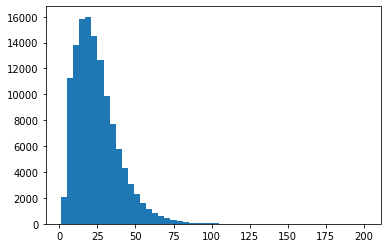

In [61]:
print("title 평균 길이:",train_data.title.map(len).mean())
print("title 중앙값 길이:",train_data.title.map(len).median())
print("title 최소 길이:",train_data.title.map(len).min())
print("title 최대 길이:",train_data.title.map(len).max())

import matplotlib.pyplot as plt
plt.hist(train_data.title.map(len),bins=50)
plt.show()

In [62]:
train_data.loc[train_data.title.map(len)==1]

# 실제 타이틀이 맞는지 확인
# 타이틀 최소 길이 후보 선정

,file,doc_id,doc_type,title,section_text,entire_text
11364,./patent_summarization_/Training/training_╞»╟π...,1020140080642,특허,롤,"이차 전지는 일차 전지와는 달리 재충전이 가능하고, 또 소형 및 대용량화 가능성으로...",\n[ 발명의 명칭 ]\n롤roll\n[ 기술분야 ]\n본 발명은 롤에 관한 것으로...
27391,./patent_summarization_/Training/training_╞»╟π...,1020137027405,특허,병,"합성수지 재료로 바닥이 있는 원통형으로 형성된 병으로서, 예를 들면 특허문헌 1에 ...",\n[ 발명의 명칭 ]\n병BOTTLE\n[ 기술분야 ]\n본 발명은 병(bottl...
27399,./patent_summarization_/Training/training_╞»╟π...,1020137027436,특허,병,"합성수지 재료로 바닥이 있는 원통형으로 형성된 병으로, 병 내부의 감압을 흡수하는 ...",\n[ 발명의 명칭 ]\n병BOTTLE\n[ 기술분야 ]\n본 발명은 병(bottl...
48061,./patent_summarization_/Training/training_╞»╟π...,1020137011053,특허,병,"합성수지 재료로 바닥이 있는 원통형으로 형성된 병으로서, 예를 들면 특허문헌 1 및...",\n[ 발명의 명칭 ]\n병BOTTLE\n[ 기술분야 ]\n본 발명은 병(bottl...
48500,./patent_summarization_/Training/training_╞»╟π...,1020137013782,특허,몹,"도 1에 도시된 바와 같이, 가정용으로 현재 이용가능한 바닥 청소 도구는 평판 몹(...","\n[ 발명의 명칭 ]\n몹MOP\n[ 기술분야 ]\n본 발명은 가정용 청소 장치,..."
64962,./patent_summarization_/Training/training_╞»╟π...,1020170020774,특허,척,"일반적으로, 피가공물을 기계적으로 가공할 때는 척에 상기 피가공물을 고정한 상태에서...",\n[ 발명의 명칭 ]\n척chuck\n[ 기술분야 ]\n본 발명은 피가공물을 용이...
76591,./patent_summarization_/Training/training_╞»╟π...,1020150143916,특허,면,일반적으로 면은 밀가루 등으로 이루어진 반죽을 홍두께나 롤러 등의 도구로 얇게 밀어...,\n[ 발명의 명칭 ]\n면NOODLES \n[ 기술분야 ]\n본 발명은 면에 관...
78801,./patent_summarization_/Training/training_╞»╟π...,1020147002139,특허,밀,종래의 제트 밀(충돌식 기류분쇄기)은 노즐로부터 제트 기류를 분쇄실 내로 분사하여 ...,"\n[ 발명의 명칭 ]\n밀Mill\n[ 기술분야 ]\n본 발명은 식품, 화학품, ..."
94495,./patent_summarization_/Training/training_╞»╟π...,1020160166513,특허,컵,일반적으로 커피나 라면등의 내용물이 매우 뜨거운 것을 수용했을 때에 무심코 들다가 ...,\n[ 발명의 명칭 ]\n컵A CUP\n[ 기술분야 ]\n본 발명은 내용물이 차겁거...
100674,./patent_summarization_/Training/training_╞»╟π...,1020160081354,특허,찌,"일반적으로 낚시에 사용되는 찌는 어신(魚信)을 알려주는 역할, 채비를 멀리 운반시키...",\n[ 발명의 명칭 ]\n찌FLOAT\n[ 기술분야 ]\n개시된 발명은 찌에 관한 ...


http://kportal.kipris.or.kr/kportal/search/total_search.do => 여기에 한 자리 title을 가진 애들 다 나옴

In [63]:
print("title의 길이가 최대길이(173)인 데이터 개수: ",len(train_data.loc[train_data.title.map(len)==173]))
print(train_data.loc[train_data.title.map(len)==173].title.values[0])

title의 길이가 최대길이(173)인 데이터 개수:  1
수중에서의 기체 윤활 기능을 이용하는 마찰저항 저감 선박에 사용되는 도료 조성물, 그 조성물로 형성되는 도막, 그 도막으로 피복된 선박, 그 선박의 제조방법, 상기 마찰저항 저감 효과를 예측하는 방법, 상기 마찰저항 저감 효과의 예측에 사용되는 장치 및 상기 마찰저항 저감 선박에 사용되는 마찰저항 저감 시스템


In [64]:
train_data.loc[train_data.title.map(len)==173]

,file,doc_id,doc_type,title,section_text,entire_text
59527,./patent_summarization_/Training/training_╞»╟π...,1020157017113,특허,"수중에서의 기체 윤활 기능을 이용하는 마찰저항 저감 선박에 사용되는 도료 조성물, ...","항행하는 선박에는 파도의 발생에 의한 조파저항, 선저의 형상에 기인하는 압력 형상저...",\n[ 발명의 명칭 ]\n수중에서의 기체 윤활 기능을 이용하는 마찰저항 저감 선박에...


## entire text

entire_text 평균 길이: 18254.10350056564
entire_text 중앙값 길이: 13206.0
entire_text 최소 길이: 1508
entire_text 최대 길이: 921815


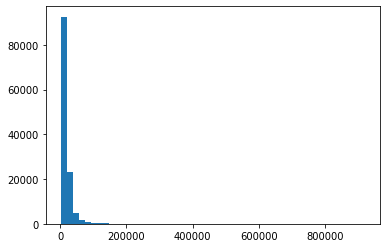

In [65]:
print("entire_text 평균 길이:",train_data.entire_text.map(len).mean())
print("entire_text 중앙값 길이:",train_data.entire_text.map(len).median())
print("entire_text 최소 길이:",train_data.entire_text.map(len).min())
print("entire_text 최대 길이:",train_data.entire_text.map(len).max())

import matplotlib.pyplot as plt
plt.hist(train_data.entire_text.map(len),bins=50)
plt.show()

In [66]:
train_data[train_data.entire_text.map(len)==832577]

,file,doc_id,doc_type,title,section_text,entire_text
79657,./patent_summarization_/Training/training_╞»╟π...,1020147013519,특허,암의 치료를 위한 ＭＤＭ２ 저해제로서의 피페리디논 유도체,"p53은 세포 주기 저지, 아포프토시스, 노화, 및 DNA 수복에 수반되는 수많은 ...",\n[ 발명의 명칭 ]\n암의 치료를 위한 ＭＤＭ２ 저해제로서의 피페리디논 유도체P...


- text 데이터가 너무 길며, 전체 내용을 input으로 활용할 모델을 사용하기엔 리소스가 제한됨
- 따라서, 특허 문서에서 필요한 부분을 선택적으로 사용 하기로 함

In [67]:
import re
def get_info(idx):
    idx_data = train_data.iloc[idx]
    print(">>         타이틀: ", idx_data.title)

    strs = idx_data.entire_text
    res_st = re.search("\[ 기술분야 \]|\[기술분야\]",strs)
    res_ed = re.search("\[ 배경기술 \]|\[배경기술\]", strs)
    print(">>       기술분야: ",strs[res_st.span()[1]:res_ed.span()[0]].strip())

    res_st = re.search("\[ 해결하려는 과제 \]",strs)
    res_ed = re.search("\[ 과제의 해결 수단 \]", strs)
    print(">>해결하려는 과제: ",strs[res_st.span()[1]:res_ed.span()[0]].strip())
    print()

In [68]:
idx_data = train_data.iloc[10]
idx_data

file            ./patent_summarization_/Training/training_╞»╟π...
doc_id                                              1020120127453
doc_type                                                       특허
title                     박막형 태양전지, 이의 제조방법 및 박막형 태양전지의 광흡수층 제조방법
section_text    최근 심각한 환경오염과 화석 에너지 고갈 등의 문제로 인해 차세대 청정에너지원의 개...
entire_text     \n[ 발명의 명칭 ]\n박막형 태양전지, 이의 제조방법 및 박막형 태양전지의 광흡...
Name: 10, dtype: object

In [69]:
s = 4
e = 10
for i in range(s,e):
    get_info(i)

>>         타이틀:  분산된 기공 구조를 갖는 ＣＭＰ패드 및 그 제조방법
>>       기술분야:  본 발명은 분산된 기공 구조를 갖는 CMP 패드 및 그 제조방법에 관한 것으로, 보다 상세하게는 분산된 기공 구조로 인하여, 우수한 연마 속도, 슬러리에 의한 웨이퍼 디펙(DEFECT) 감소 효과를 갖는, 분산된 기공 구조를 갖는 CMP 패드 및 그 제조방법에 관한 것이다.
>>해결하려는 과제:  따라서, 본 발명이 해결하고자 하는 과제는 분산된 기공 구조로 인하여, 우수한 연마 속도, 슬러리에 의한 웨이퍼 디펙(DEFECT) 감소 효과를 갖는 CMP 패드 및 그 제조방법을 제공하는 것이다.

>>         타이틀:  전자 패널용 칼라 광펜
>>       기술분야:  전자 패널용 칼라 펜에 관한 것으로, 보다 상세하게는 사용자의 편의성을 제공할 수 있는 전자 패널용 칼라 광펜에 관한 것이다.
>>해결하려는 과제:  단말 장치의 표시부에 메뉴판 기능 없이도 칼라로 글씨를 쓰거나 그림을 그릴 수 있도록 하여 사용자의 편의성을 높일 수 있는 전자 패널용 칼라 광펜을 제공한다.

>>         타이틀:  퇴적물 퇴적 방지형 피스톤
>>       기술분야:  본 발명은 퇴적물 퇴적 방지형 피스톤에 관한 것으로, 더욱 상세하게는 피스톤 랜드부의 압력 밸런스를 유지하고 오일 소모 및 탄화물 퇴적을 개선하기 위해 퇴적물 퇴적 방지 링을 이용한 피스톤에 관한 것이다.
>>해결하려는 과제:  본 발명은 상기와 같은 점을 개선하기 위해 고안한 것으로서, 피스톤 랜드부의 오일 업 방지 홈에 퇴적물 퇴적 방지 링을 조립하여 엔진 운전시 상기 홈에 퇴적물이 퇴적되는 것을 방지할 수 있는 퇴적물 퇴적 방지형 피스톤을 제공하는데 그 목적이 있다.

>>         타이틀:  오일쿨러 장치
>>       기술분야:  본 발명은 오일쿨러 장치에 관한 것으로서, 특히 오일쿨러의 효율성과 내구성을 향상시키기 위한 오일쿨러 장치에 관한 것이다.
>>해결하려는 과제:  

In [70]:
import re
def find_text(text):
    res_st = re.search("\[ 기술분야 \]|\[기술분야\]",text)
    res_ed = re.search("\[ 배경기술 \]|\[배경기술\]", text)
    return text[res_st.span()[1]:res_ed.span()[0]].strip()


In [71]:
train_data.head(2)

,file,doc_id,doc_type,title,section_text,entire_text
0,./patent_summarization_/Training/training_╞»╟π...,1020120126686,특허,육안 조준기 및 육안 조준기를 구비한 방범 센서,"이 종류의 능동형 방범용 센서 장치는, 직선적인 경계 구역의 양 단부에, 적외선 투...",\n[ 발명의 명칭 ]\n육안 조준기 및 육안 조준기를 구비한 방범 센서SIGHTI...
1,./patent_summarization_/Training/training_╞»╟π...,1020120126766,특허,평활커패시터 돌입전류 유입방지 EPS시스템,일반적으로 자동차 등의 조향 안정성을 보장하기 위하여 별도의 동력으로 보조하는 조향...,\n[ 발명의 명칭 ]\n평활커패시터 돌입전류 유입방지 EPS시스템EPS SYSTE...


In [72]:
train_data.loc[i].entire_text

'\n[ 발명의 명칭 ]\n원통형 전자식 변속 레버Cylinder Type Electronic Shift Lever\n[ 기술분야 ]\n본 발명은 전자식 변속 레버를 원통형으로 형성함으로써, 변속 모드 조작을 보다 더 용이하게 하고, 운전자의 변속모드에 대한 시인성을 향상시키는 전자식 변속 레버에 관한 것이다.\n[ 배경기술 ]\n통상 차량용 변속장치는 크게 자동 변속기와 수동 변속기로 구분된다. 이중 상기 자동변속기의 종류로는 유성기어를 이용하는 자동변속기와 무단 변속장치를 이용하는 무단변속기가 있다. 상기 무단변속기(Continuously Variable Transmission; CVT)는 운전자가 변속 레버로 P-R-N-D레인지를 선택하면, 차속 및 스로틀 개도에 따라 TCU(Transmission Control Unit)가 구동 풀리 및 종동 풀리의 직경을 가변시키도록 제어하게 되며, 이와 같은 동작으로 인해 상기 무단 변속기는 입력되는 회전동력과 출력되는 회전동력을 연속적으로 변속하게 된다.한편, 최근에는 차량의 변속시스템을 기계식이 아닌 전자식으로 제어하는 시프트 바이 와이어(shift by wire) 시스템이 개발되면서 이에 대한 관심이 집중되고 있다. 시프트 바이 와이어 시스템은 변속기와 변속 레버의 기계적인 연결구조를 전기적으로 작동하는 액츄에이터와 전자식 변속 레버 및 ECU(Electronic control unit)를 이용하여 전자적으로 변속 제어를 이루는 변속시스템을 말한다.이러한 시프트 바이 와이어 변속시스템은 변속 레버의 위치변화를 위치센서수단을 이용하여 변속 레버의 변화된 위치를 전기적인 신호로 변환하고, 이 신호를 TCU(Transmission Control Unit)로 입력하며, 상기 TCU(Transmission Control Unit)의 제어에 따라 변속이 이루어진다. 상기 시프트 바이 와이어 변속시스템은 기존의 기계식 변속 레버 시스템과 비교해 볼 때 레버 조작력이나 조작감이 우수하며, 또한 간단한 스위치 버튼 조작으로 변

In [73]:
train_data['key_text']=train_data.entire_text.map(find_text)
test_data['key_text']=test_data.entire_text.map(find_text)

In [74]:
bf_ch = ["│φ╣«","╞»╟π╝╜╝╟╕╕","╞»╟π└ⁿ├╝"]
af_ch = ["논문","특허섹션만","특허전체"]
def rename_path(path):
    for i in range(3):
        path = path.replace(bf_ch[i], af_ch[i])
    return [path]

In [75]:
train_data['key_text'] = train_data.key_text.map(lambda x : rename_path(x))
test_data['key_text'] = test_data.key_text.map(lambda x : rename_path(x))

In [76]:
train_data.drop(["section_text","entire_text"],axis=1,inplace=True)
train_data.rename(columns={'key_text':'text'}, inplace=True)

test_data.drop(["section_text","entire_text"],axis=1,inplace=True)
test_data.rename(columns={'key_text':'text'}, inplace=True)


text 평균 길이: 1.0
text 중앙값 길이: 1.0
text 최소 길이: 1
text 최대 길이: 1


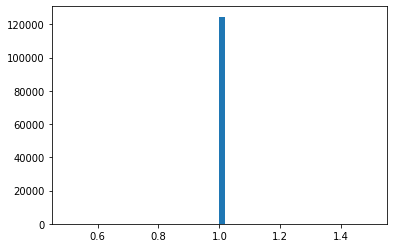

In [77]:
print("text 평균 길이:",train_data.text.map(len).mean())
print("text 중앙값 길이:",train_data.text.map(len).median())
print("text 최소 길이:",train_data.text.map(len).min())
print("text 최대 길이:",train_data.text.map(len).max())

import matplotlib.pyplot as plt
plt.hist(train_data.text.map(len),bins=50)
plt.show()

# csv file로 저장

In [51]:
train_data.to_csv("train.csv",encoding="utf-8",index=False)
test_data.to_csv("test.csv",encoding="utf-8",index=False)

In [37]:
# !rm -r ../../.cache/huggingface/datasets/*
# !ls ../../.cache/huggingface/datasets/*
from datasets import load_dataset
patent_dataset = load_dataset("metamong1/patent_summarization",use_auth_token="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")

Downloading:   0%|          | 0.00/2.58k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset paper_summarization downloaded and prepared to /opt/ml/.cache/huggingface/datasets/metamong1___paper_summarization/patent Summarization/1.0.0/6d8a2bc04c5f0e2df402564cc1b1e58eb3924094d21f9cf8f936f30cc9ab45a4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
patent_dataset['train'].to_pandas().text.map(eval)[0][0]

'본 발명은 정보 표시 장치에 관한 발명으로서, 더욱 상세하게는 정보 검출 대상체와 인력을 형성하여 부착되도록 하고, 부착된 정보 검출 대상체로부터 일정 정보를 검출하여 미리 설정된 표시 정보를 디스플레이하는 정보 표시 장치에 관한 것이다.'